In [1]:
# importing the necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# converting the image into a tensor and normalizing it with the standard values for the 3 channels
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 
# creating a training set from the inbuilt dataset CIFAR-10 of pytorch
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# loading the data from the created dataset. we are going to randomize it.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
# creating a test set from the inbuilt test set of CIFAR-10 in pytorch
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
# loading the data from the created daataset. no need to randomize.
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
# mentioning the various classes present in the dataset to check each individual classes accuracy later on
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


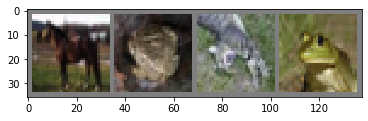

horse  frog   cat  frog


In [6]:
# importing a few important libraries. matplotlib will be used to just visualise a few images of our dataset before working on the network.
import numpy as np
import matplotlib.pyplot as plt
# displaying a few images(4) from our training dataset for better visualisation
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter=iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [7]:
# importing important libraries for building a neural network
import torch.nn as nn
import torch.nn.functional as F

# the main class which will comprise of our neural network.
class Net(nn.Module):
#     defining function to declare the various layers in our network. here we have chosen 2 convolutional layers, 1 max pool layer and 3 fully connected layers.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
# defining the connection between the various layers. we will be using the widely used ReLU function as the activation function. 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# creating an object of our actual class which will handle the input - output
net = Net()

In [8]:
# importing the necessary library for using the method to minimise(optimise) our cost function. we will be using the SGD method.
import torch.optim as optim
# we will be using the cross entropy loss function as our loss function.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # making the parameter gradients 0 before each epoch begins
        optimizer.zero_grad()

        # proceed forward in the network, carry out backpropagation and finally optimize the cost function
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.302
[1,   200] loss: 2.300
[1,   300] loss: 2.296
[1,   400] loss: 2.308
[1,   500] loss: 2.291
[1,   600] loss: 2.297
[1,   700] loss: 2.293
[1,   800] loss: 2.278
[1,   900] loss: 2.264
[1,  1000] loss: 2.223
[1,  1100] loss: 2.191
[1,  1200] loss: 2.079
[1,  1300] loss: 2.084
[1,  1400] loss: 2.077
[1,  1500] loss: 2.023
[1,  1600] loss: 2.014
[1,  1700] loss: 1.997
[1,  1800] loss: 2.017
[1,  1900] loss: 2.036
[1,  2000] loss: 1.957
[1,  2100] loss: 1.971
[1,  2200] loss: 1.876
[1,  2300] loss: 1.904
[1,  2400] loss: 1.919
[1,  2500] loss: 1.853
[1,  2600] loss: 1.874
[1,  2700] loss: 1.843
[1,  2800] loss: 1.845
[1,  2900] loss: 1.764
[1,  3000] loss: 1.880
[1,  3100] loss: 1.873
[1,  3200] loss: 1.793
[1,  3300] loss: 1.782
[1,  3400] loss: 1.756
[1,  3500] loss: 1.781
[1,  3600] loss: 1.748
[1,  3700] loss: 1.737
[1,  3800] loss: 1.859
[1,  3900] loss: 1.756
[1,  4000] loss: 1.721
[1,  4100] loss: 1.793
[1,  4200] loss: 1.792
[1,  4300] loss: 1.621
[1,  4400] 

[3, 10700] loss: 1.115
[3, 10800] loss: 1.189
[3, 10900] loss: 1.134
[3, 11000] loss: 1.156
[3, 11100] loss: 1.040
[3, 11200] loss: 1.159
[3, 11300] loss: 1.137
[3, 11400] loss: 1.185
[3, 11500] loss: 1.151
[3, 11600] loss: 1.163
[3, 11700] loss: 1.083
[3, 11800] loss: 1.093
[3, 11900] loss: 1.261
[3, 12000] loss: 1.124
[3, 12100] loss: 1.234
[3, 12200] loss: 1.154
[3, 12300] loss: 1.140
[3, 12400] loss: 1.139
[3, 12500] loss: 1.173
[4,   100] loss: 1.065
[4,   200] loss: 1.066
[4,   300] loss: 1.089
[4,   400] loss: 1.043
[4,   500] loss: 1.110
[4,   600] loss: 1.157
[4,   700] loss: 1.139
[4,   800] loss: 1.068
[4,   900] loss: 1.129
[4,  1000] loss: 1.002
[4,  1100] loss: 1.058
[4,  1200] loss: 1.023
[4,  1300] loss: 1.155
[4,  1400] loss: 1.126
[4,  1500] loss: 1.023
[4,  1600] loss: 1.155
[4,  1700] loss: 1.023
[4,  1800] loss: 1.144
[4,  1900] loss: 1.027
[4,  2000] loss: 1.183
[4,  2100] loss: 1.090
[4,  2200] loss: 1.081
[4,  2300] loss: 1.106
[4,  2400] loss: 1.045
[4,  2500] 

[6,  8800] loss: 0.879
[6,  8900] loss: 0.929
[6,  9000] loss: 0.969
[6,  9100] loss: 0.918
[6,  9200] loss: 0.895
[6,  9300] loss: 0.875
[6,  9400] loss: 0.890
[6,  9500] loss: 0.992
[6,  9600] loss: 0.931
[6,  9700] loss: 1.060
[6,  9800] loss: 0.904
[6,  9900] loss: 0.914
[6, 10000] loss: 1.018
[6, 10100] loss: 0.986
[6, 10200] loss: 0.984
[6, 10300] loss: 1.023
[6, 10400] loss: 0.953
[6, 10500] loss: 0.905
[6, 10600] loss: 0.871
[6, 10700] loss: 0.914
[6, 10800] loss: 0.969
[6, 10900] loss: 0.987
[6, 11000] loss: 1.027
[6, 11100] loss: 0.879
[6, 11200] loss: 0.985
[6, 11300] loss: 0.862
[6, 11400] loss: 0.959
[6, 11500] loss: 0.954
[6, 11600] loss: 0.930
[6, 11700] loss: 1.077
[6, 11800] loss: 0.921
[6, 11900] loss: 0.911
[6, 12000] loss: 0.967
[6, 12100] loss: 1.113
[6, 12200] loss: 0.916
[6, 12300] loss: 0.985
[6, 12400] loss: 1.012
[6, 12500] loss: 1.010
[7,   100] loss: 0.934
[7,   200] loss: 0.825
[7,   300] loss: 0.896
[7,   400] loss: 0.875
[7,   500] loss: 0.960
[7,   600] 

[9,  6900] loss: 0.861
[9,  7000] loss: 0.858
[9,  7100] loss: 0.837
[9,  7200] loss: 0.896
[9,  7300] loss: 0.814
[9,  7400] loss: 1.091
[9,  7500] loss: 0.772
[9,  7600] loss: 0.843
[9,  7700] loss: 0.897
[9,  7800] loss: 0.812
[9,  7900] loss: 0.854
[9,  8000] loss: 0.772
[9,  8100] loss: 0.853
[9,  8200] loss: 0.863
[9,  8300] loss: 0.913
[9,  8400] loss: 0.858
[9,  8500] loss: 0.807
[9,  8600] loss: 0.824
[9,  8700] loss: 0.885
[9,  8800] loss: 0.781
[9,  8900] loss: 0.859
[9,  9000] loss: 0.779
[9,  9100] loss: 0.809
[9,  9200] loss: 0.916
[9,  9300] loss: 0.844
[9,  9400] loss: 0.781
[9,  9500] loss: 0.930
[9,  9600] loss: 0.775
[9,  9700] loss: 0.820
[9,  9800] loss: 0.943
[9,  9900] loss: 0.835
[9, 10000] loss: 0.955
[9, 10100] loss: 0.887
[9, 10200] loss: 0.766
[9, 10300] loss: 0.866
[9, 10400] loss: 0.915
[9, 10500] loss: 0.910
[9, 10600] loss: 0.874
[9, 10700] loss: 0.850
[9, 10800] loss: 0.930
[9, 10900] loss: 0.933
[9, 11000] loss: 0.835
[9, 11100] loss: 0.823
[9, 11200] 

[12,  3700] loss: 0.729
[12,  3800] loss: 0.708
[12,  3900] loss: 0.800
[12,  4000] loss: 0.792
[12,  4100] loss: 0.890
[12,  4200] loss: 0.851
[12,  4300] loss: 0.748
[12,  4400] loss: 0.731
[12,  4500] loss: 0.737
[12,  4600] loss: 0.751
[12,  4700] loss: 0.784
[12,  4800] loss: 0.802
[12,  4900] loss: 0.678
[12,  5000] loss: 0.825
[12,  5100] loss: 0.823
[12,  5200] loss: 0.724
[12,  5300] loss: 0.744
[12,  5400] loss: 0.787
[12,  5500] loss: 0.750
[12,  5600] loss: 0.764
[12,  5700] loss: 0.779
[12,  5800] loss: 0.817
[12,  5900] loss: 0.699
[12,  6000] loss: 0.796
[12,  6100] loss: 0.742
[12,  6200] loss: 0.858
[12,  6300] loss: 0.729
[12,  6400] loss: 0.777
[12,  6500] loss: 0.878
[12,  6600] loss: 0.819
[12,  6700] loss: 0.864
[12,  6800] loss: 0.760
[12,  6900] loss: 0.711
[12,  7000] loss: 0.773
[12,  7100] loss: 0.897
[12,  7200] loss: 0.738
[12,  7300] loss: 0.810
[12,  7400] loss: 0.739
[12,  7500] loss: 0.885
[12,  7600] loss: 0.749
[12,  7700] loss: 0.757
[12,  7800] loss

[15,   300] loss: 0.645
[15,   400] loss: 0.545
[15,   500] loss: 0.635
[15,   600] loss: 0.661
[15,   700] loss: 0.687
[15,   800] loss: 0.593
[15,   900] loss: 0.656
[15,  1000] loss: 0.686
[15,  1100] loss: 0.647
[15,  1200] loss: 0.721
[15,  1300] loss: 0.579
[15,  1400] loss: 0.711
[15,  1500] loss: 0.620
[15,  1600] loss: 0.608
[15,  1700] loss: 0.697
[15,  1800] loss: 0.607
[15,  1900] loss: 0.658
[15,  2000] loss: 0.572
[15,  2100] loss: 0.609
[15,  2200] loss: 0.685
[15,  2300] loss: 0.542
[15,  2400] loss: 0.590
[15,  2500] loss: 0.623
[15,  2600] loss: 0.638
[15,  2700] loss: 0.590
[15,  2800] loss: 0.641
[15,  2900] loss: 0.690
[15,  3000] loss: 0.724
[15,  3100] loss: 0.650
[15,  3200] loss: 0.810
[15,  3300] loss: 0.703
[15,  3400] loss: 0.649
[15,  3500] loss: 0.630
[15,  3600] loss: 0.776
[15,  3700] loss: 0.710
[15,  3800] loss: 0.664
[15,  3900] loss: 0.697
[15,  4000] loss: 0.683
[15,  4100] loss: 0.689
[15,  4200] loss: 0.704
[15,  4300] loss: 0.715
[15,  4400] loss

[17,  9400] loss: 0.649
[17,  9500] loss: 0.760
[17,  9600] loss: 0.687
[17,  9700] loss: 0.653
[17,  9800] loss: 0.693
[17,  9900] loss: 0.563
[17, 10000] loss: 0.773
[17, 10100] loss: 0.727
[17, 10200] loss: 0.684
[17, 10300] loss: 0.738
[17, 10400] loss: 0.685
[17, 10500] loss: 0.784
[17, 10600] loss: 0.728
[17, 10700] loss: 0.848
[17, 10800] loss: 0.683
[17, 10900] loss: 0.728
[17, 11000] loss: 0.669
[17, 11100] loss: 0.764
[17, 11200] loss: 0.629
[17, 11300] loss: 0.736
[17, 11400] loss: 0.721
[17, 11500] loss: 0.593
[17, 11600] loss: 0.728
[17, 11700] loss: 0.701
[17, 11800] loss: 0.753
[17, 11900] loss: 0.743
[17, 12000] loss: 0.584
[17, 12100] loss: 0.682
[17, 12200] loss: 0.764
[17, 12300] loss: 0.681
[17, 12400] loss: 0.755
[17, 12500] loss: 0.737
[18,   100] loss: 0.616
[18,   200] loss: 0.550
[18,   300] loss: 0.571
[18,   400] loss: 0.471
[18,   500] loss: 0.613
[18,   600] loss: 0.649
[18,   700] loss: 0.557
[18,   800] loss: 0.578
[18,   900] loss: 0.491
[18,  1000] loss

[20,  6000] loss: 0.582
[20,  6100] loss: 0.608
[20,  6200] loss: 0.625
[20,  6300] loss: 0.761
[20,  6400] loss: 0.549
[20,  6500] loss: 0.522
[20,  6600] loss: 0.765
[20,  6700] loss: 0.600
[20,  6800] loss: 0.663
[20,  6900] loss: 0.700
[20,  7000] loss: 0.688
[20,  7100] loss: 0.635
[20,  7200] loss: 0.718
[20,  7300] loss: 0.674
[20,  7400] loss: 0.638
[20,  7500] loss: 0.711
[20,  7600] loss: 0.639
[20,  7700] loss: 0.684
[20,  7800] loss: 0.681
[20,  7900] loss: 0.635
[20,  8000] loss: 0.664
[20,  8100] loss: 0.692
[20,  8200] loss: 0.786
[20,  8300] loss: 0.622
[20,  8400] loss: 0.646
[20,  8500] loss: 0.727
[20,  8600] loss: 0.671
[20,  8700] loss: 0.728
[20,  8800] loss: 0.648
[20,  8900] loss: 0.716
[20,  9000] loss: 0.666
[20,  9100] loss: 0.652
[20,  9200] loss: 0.633
[20,  9300] loss: 0.689
[20,  9400] loss: 0.555
[20,  9500] loss: 0.622
[20,  9600] loss: 0.640
[20,  9700] loss: 0.698
[20,  9800] loss: 0.730
[20,  9900] loss: 0.665
[20, 10000] loss: 0.761
[20, 10100] loss

In [10]:
# initialising parameters to calculate overall accuracy 
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [11]:
# initializing parameters to calculate the accuracy of the individual classes as defined earlier
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 82 %
Accuracy of  bird : 52 %
Accuracy of   cat : 40 %
Accuracy of  deer : 56 %
Accuracy of   dog : 50 %
Accuracy of  frog : 65 %
Accuracy of horse : 67 %
Accuracy of  ship : 75 %
Accuracy of truck : 68 %
